<a href="https://colab.research.google.com/github/GazalaSayyad/Deep-Learning/blob/master/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [0]:
import matplotlib.pyplot as plt

In [0]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])

In [5]:
# Downloading the Training set
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', train = True, transform=transform, download=True)


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...
Done!


In [0]:
# Loading the downloaded training set
trainloader = torch.utils.data.DataLoader(trainset, shuffle=True, batch_size=64)

In [0]:
# Downloading the testing set
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', train = False, transform=transform, download = True)

In [0]:
# Loading the downloaded testing set
testloader = torch.utils.data.DataLoader(testset, shuffle=False, batch_size=64)

In [10]:
for (X_train, y_train) in trainloader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([64, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([64]) type: torch.LongTensor


Plotting first 25 images

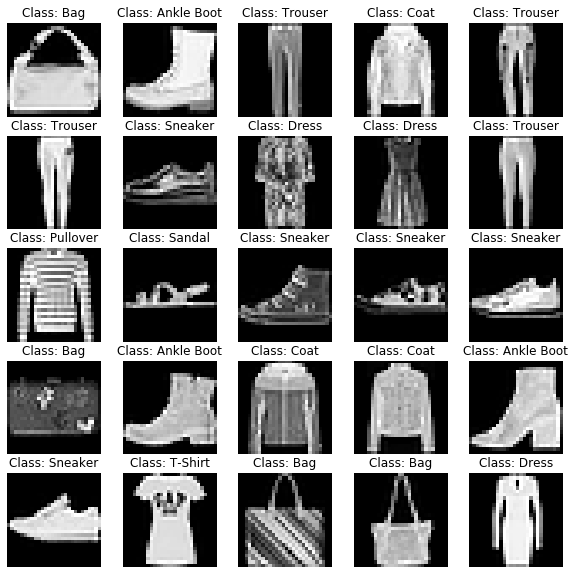

In [11]:
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'};
pltsize=1
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(X_train[i,:,:,:].numpy().reshape(28,28), cmap="gray")
    plt.title('Class: '+labels_map[int(str(y_train[i])[-2])])
    

In [0]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 256)
        self.l2 = nn.Linear(256, 128)
        self.l3 = nn.Linear(128,64)
        self.l4 = nn.Linear(64,10)
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = F.log_softmax(self.l4(x), dim=1)
        return x

In [0]:
model = Model()

Loss function


In [0]:
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr=0.005)

Training and Testing the model

In [15]:
epoch = 30

train_losses, test_losses = [],[]
## Training Phaseb
for e in range(epoch):
    train_loss = 0
    test_loss = 0
    accuracy = 0
    for images, labels in trainloader:
      '''The view function is used to reshape the size of the tensor. 
         If there is any situation that you don't know how many 
         rows you want but your sure of the number of columns, then
         inplace of them we use -1 '''
      images = images.view(-1, 28*28)
        # zero outing the gradients
      optimizer.zero_grad()
        # Passing the data to the model (Forward Pass)
      op = model(images)
        # Calculating the loss
      loss = criterion(op, labels)
      train_loss += loss.item()
        # Performing backward pass (Backpropagation)
      loss.backward()
      optimizer.step()
## Testing Phase
    else:
        with torch.no_grad():
        #Keeping the model(network) in evaluation mode
            model.eval()
            for images,labels in testloader:
                '''The view function is used to reshape the size of the tensor. 
                   If there is any situation that you don't know how many 
                   rows you want but your sure of the number of columns, then
                   inplace of them we use -1 '''
                images = images.view(-1, 28*28)
                # Passing images to the model, which return the probabilites as outputs
                log_ps = model(images)
                prob = torch.exp(log_ps)
                # Picking the class / label with maximum probability
                top_probs, top_classes = prob.topk(1, dim=1)
                equals = labels == top_classes.view(labels.shape)
                # Calculating the accuracy
                accuracy += equals.type(torch.FloatTensor).mean()
                # Calculating the loss
                test_loss += criterion(log_ps, labels)
        # Keeping the model(network) in training mode
        model.train()
    print("Epoch: {}/{}.. ".format(e+1, epoch),
              "Training Loss: {:.3f}.. ".format(train_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
    train_losses.append(train_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))

Epoch: 1/30..  Training Loss: 1.813..  Test Loss: 1.048..  Test Accuracy: 0.643
Epoch: 2/30..  Training Loss: 0.811..  Test Loss: 0.715..  Test Accuracy: 0.735
Epoch: 3/30..  Training Loss: 0.639..  Test Loss: 0.617..  Test Accuracy: 0.769
Epoch: 4/30..  Training Loss: 0.571..  Test Loss: 0.586..  Test Accuracy: 0.786
Epoch: 5/30..  Training Loss: 0.527..  Test Loss: 0.532..  Test Accuracy: 0.809
Epoch: 6/30..  Training Loss: 0.497..  Test Loss: 0.516..  Test Accuracy: 0.815
Epoch: 7/30..  Training Loss: 0.475..  Test Loss: 0.495..  Test Accuracy: 0.820
Epoch: 8/30..  Training Loss: 0.457..  Test Loss: 0.486..  Test Accuracy: 0.825
Epoch: 9/30..  Training Loss: 0.443..  Test Loss: 0.468..  Test Accuracy: 0.831
Epoch: 10/30..  Training Loss: 0.430..  Test Loss: 0.476..  Test Accuracy: 0.823
Epoch: 11/30..  Training Loss: 0.419..  Test Loss: 0.452..  Test Accuracy: 0.836
Epoch: 12/30..  Training Loss: 0.410..  Test Loss: 0.457..  Test Accuracy: 0.832
Epoch: 13/30..  Training Loss: 0.401.

Plotting Loss

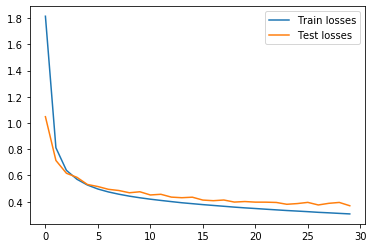

In [16]:
plt.plot(train_losses,label = "Train losses")
plt.plot(test_losses, label = "Test losses")
plt.legend()
plt.show()